In [20]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
plt.rcParams['font.family'] = 'NanumGothic'

In [21]:
# Read_csv

df = pd.read_csv('../../data/실습데이터.csv')

In [ ]:
# Define data

df.info()

In [23]:
# 월별거래일자 Feature 생성
df['월별거래일자'] = df['거래일자'].str.split('.')

# 월별거래일자에서 월(月)만 추출
for i in tqdm(range(len(df['월별거래일자']))):
    df['월별거래일자'][i] = df['월별거래일자'][i][1].lstrip() + '월'

  0%|          | 0/159328 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_4420\521701960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월별거래일자'][i] = df['월별거래일자'][i][1].lstrip() + '월'
100%|██████████| 159328/159328 [00:52<00:00, 3019.53it/s]


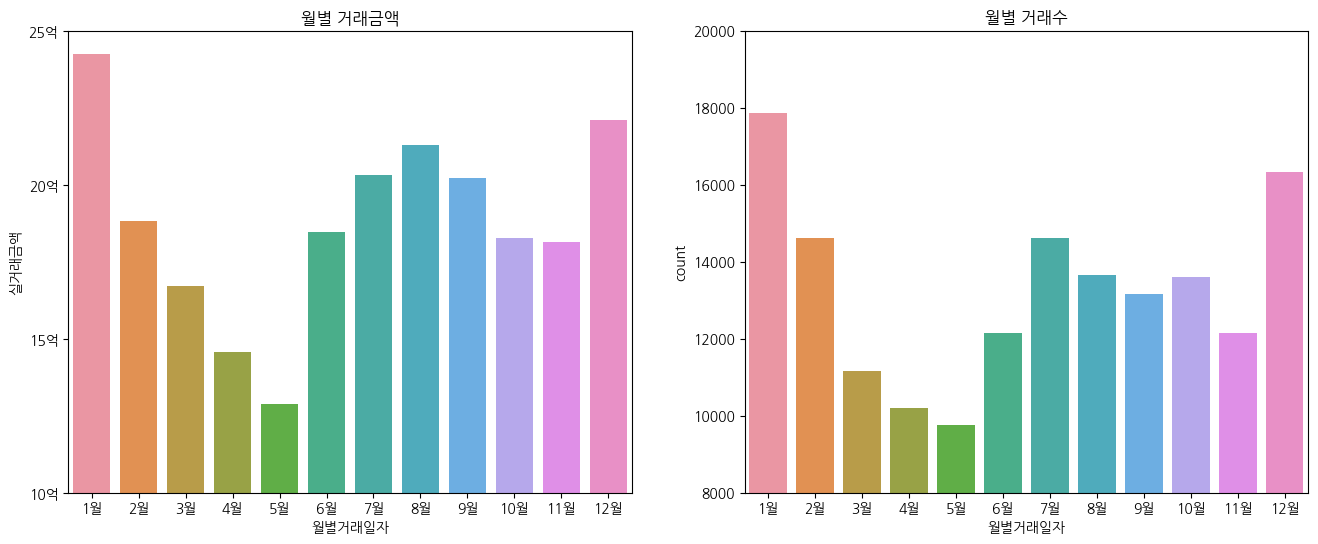

In [25]:
# 월별 거래금액, 거래수 Visualization

# df['월별거래일자'] = df['월별거래일자'].astype('int') # X축 정렬을 위해 int 타입으로 변환

plt.figure(figsize=(16, 6)) # figure 사이즈 설정

# 월별 거래금액

month_price = pd.Series(df.groupby('월별거래일자')['실거래금액'].sum()) # 월별 거래 금액 

plt.subplot(1, 2, 1)
sns.barplot(data=df, x=month_price.index, y=month_price,\
    order=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월' ,'9월', '10월', '11월', '12월'], errwidth=0, width=0.7) # 월별 거래금액 차트 그리기
plt.ylim(1000000000, 2500000000) # 극적인 표현을 위해 y축 리미트를 줌
plt.yticks(np.arange(1000000000, 2600000000, 500000000), labels=['10억', '15억', '20억', '25억'])
plt.title('(원)', loc='left', fontsize=10)
plt.title('월별 거래금액', loc = 'right', fontsize = 15, fontweight = 'bold', pad=15) # 타이틀

# 월별 거래수
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='월별거래일자', order=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월' ,'9월', '10월', '11월', '12월'],\
    width=0.7)
plt.ylim(8000, 20000)
plt.title('월별 거래수', loc = 'right', fontsize = 15, fontweight = 'bold', pad=15) # 타이틀

plt.show()